In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
dataset=pd.read_csv('C:\\Users\\nair.gangadharan\\Desktop\\TrainingData.csv')

In [3]:
dataset.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
dataset_copy=dataset.copy(deep=True)

In [5]:
dataset_copy.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [382]:
dataset_copy['Item_Fat_Content'].value_counts()

Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: Item_Fat_Content, dtype: int64

In [383]:
fat_map={'Low Fat':'Low','Regular':'Medium','LF':'Low','reg':'Medium','low fat':'Low'}

In [384]:
dataset_copy['Item_Fat_Content']=dataset_copy['Item_Fat_Content'].map(fat_map)

In [385]:
dataset_copy['Item_Type'].value_counts()

Snack Foods              789
Fruits and Vegetables    781
Household                638
Frozen Foods             570
Dairy                    454
Baking Goods             438
Canned                   435
Health and Hygiene       338
Meat                     311
Soft Drinks              281
Breads                   165
Hard Drinks              148
Starchy Foods            121
Others                   111
Breakfast                 76
Seafood                   25
Name: Item_Type, dtype: int64

In [386]:
dataset_copy['Item_Type'].isna().sum()

0

In [387]:
type_map={'Hard Drinks':'Fluid','Soft Drinks':'Fluid','Seafood':'Meat','Meat':'Meat','Breads':'Bakery','Baking Goods':'Bakery',
         'Fruits and Vegetables':'Healthy','Health and Hygiene':'Healthy','Dairy':'Dairy','Canned':'Frozen','Frozen Foods':'Frozen'
         ,'Breakfast':'Others','Others':'Others','Starchy Foods':'Fluid','Snack Foods':'Snacks','Household':'Household'}

In [388]:
dataset_copy['Item_Type']=dataset_copy['Item_Type'].map(type_map)

In [389]:
item_avg_weight=dataset_copy.groupby(['Item_Identifier','Item_Weight']).mean().reset_index()[['Item_Identifier','Item_Weight']]

In [390]:
dataset_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
Item_Identifier              5681 non-null object
Item_Weight                  4705 non-null float64
Item_Fat_Content             5681 non-null object
Item_Visibility              5681 non-null float64
Item_Type                    5681 non-null object
Item_MRP                     5681 non-null float64
Outlet_Identifier            5681 non-null object
Outlet_Establishment_Year    5681 non-null int64
Outlet_Size                  4075 non-null object
Outlet_Location_Type         5681 non-null object
Outlet_Type                  5681 non-null object
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [391]:
item_avg_weight=item_avg_weight.reset_index().drop('index',axis=1)

In [392]:
dataset_copy[['Item_Weight']] = dataset_copy[['Item_Weight']].replace(np.NaN,0)

In [393]:
item_avg_weight_dict=item_avg_weight.set_index('Item_Identifier')['Item_Weight'].to_dict()
r,c=dataset_copy.shape

In [394]:
value_arr=[]
for i in range(0,r):
    if(dataset_copy['Item_Weight'][i]==0):
        value_arr.append(item_avg_weight_dict.get(dataset_copy['Item_Identifier'][i]))
    else:
        value_arr.append(dataset_copy['Item_Weight'][i])

In [395]:
dataset_copy['Item_Weight']=value_arr

In [396]:
dataset_copy.Item_Identifier.nunique()

1543

In [397]:
dataset_copy[['Item_Weight']] = dataset_copy[['Item_Weight']].replace(0,np.NaN)

In [398]:
dataset_copy['Item_Weight'].fillna(dataset['Item_Weight'].mean(), inplace = True)

In [399]:
dataset_copy['Outlet_Type'].value_counts()

Supermarket Type1    3717
Grocery Store         722
Supermarket Type3     624
Supermarket Type2     618
Name: Outlet_Type, dtype: int64

In [400]:
table = pd.pivot_table(dataset_copy, values='Item_Outlet_Sales', index=['Outlet_Type'],columns=['Outlet_Size'])

KeyError: 'Item_Outlet_Sales'

In [358]:
table

Outlet_Size,High,Medium,Small
Outlet_Type,,,
Grocery Store,NaN,NaN,340.329723
Supermarket Type1,2298.995256,2348.354635,2358.343066
Supermarket Type2,NaN,1995.498739,NaN
Supermarket Type3,NaN,3694.038558,NaN


In [359]:
dataset_copy.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Medium,0.019278,Fluid,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Medium,0.000000,Healthy,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [401]:
dataset_copy[['Outlet_Size']] = dataset_copy[['Outlet_Size']].replace(np.NaN,0)

In [402]:
#dataset_copy[['Outlet_Size']] = dataset_copy[['Outlet_Size']].replace(np.NaN,0)
value_arr=[]
for i in range(0,r):
    if(dataset_copy['Outlet_Size'][i]==0):
        if(dataset_copy['Outlet_Type'][i]=='Grocery Store'):
            value_arr.append('Small')
        elif(dataset_copy['Outlet_Type'][i]=='Supermarket Type1'):
            value_arr.append('Small')
        elif(dataset_copy['Outlet_Type'][i]=='Supermarket Type2'):
            value_arr.append('Medium')
        else:
            value_arr.append('Medium')
    else:
        value_arr.append(dataset_copy['Outlet_Size'][i])

            

In [403]:
dataset_copy['Outlet_Size']=value_arr

In [406]:
dataset_copy.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [365]:
dataset_copy.drop(['Item_Identifier', 'Outlet_Identifier'], axis=1, inplace=True)

In [366]:

dataset_copy = pd.get_dummies(dataset_copy)

In [367]:
dataset_copy.shape

(8523, 26)

In [407]:
dataset_copy.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [368]:
from sklearn.model_selection import train_test_split
train , test = train_test_split(dataset_copy, test_size = 0.3)

x_train = train.drop('Item_Outlet_Sales', axis=1)
y_train = train['Item_Outlet_Sales']

x_test = test.drop('Item_Outlet_Sales', axis = 1)
y_test = test['Item_Outlet_Sales']

In [369]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)


D:\Softwares\Python\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [370]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt

In [371]:
rmse_val = [] #to store rmse values for different k
for K in range(100):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(x_train, y_train)  #fit the model
    pred=model.predict(x_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 4358.7997214749685
RMSE value for k=  2 is: 3554.937100404028
RMSE value for k=  3 is: 3206.1536711860354
RMSE value for k=  4 is: 2981.87373897013
RMSE value for k=  5 is: 2878.2420858763157
RMSE value for k=  6 is: 2782.74272095524
RMSE value for k=  7 is: 2698.9552423020814
RMSE value for k=  8 is: 2623.096068619396
RMSE value for k=  9 is: 2569.4959457531772
RMSE value for k=  10 is: 2509.3710500855223
RMSE value for k=  11 is: 2447.079541104827
RMSE value for k=  12 is: 2414.3883409218092
RMSE value for k=  13 is: 2383.011817776921
RMSE value for k=  14 is: 2372.0873838852717
RMSE value for k=  15 is: 2358.9029372668633
RMSE value for k=  16 is: 2350.0157347644745
RMSE value for k=  17 is: 2353.803775881952
RMSE value for k=  18 is: 2368.213344608054
RMSE value for k=  19 is: 2376.437185713193
RMSE value for k=  20 is: 2385.8215920343077
RMSE value for k=  21 is: 2397.4581259071974
RMSE value for k=  22 is: 2405.3287813087722
RMSE value for k=  23 is: 2410

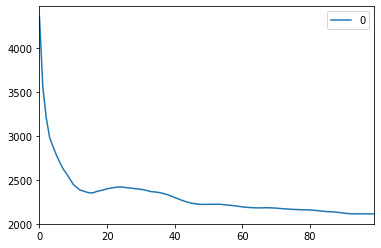

In [372]:
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [373]:
model = neighbors.KNeighborsRegressor(n_neighbors = 19)
model.fit(x_train, y_train)
pred=model.predict(x_test)


In [374]:
pred.shape

(2557,)

In [375]:
y_test.shape

(2557,)

In [409]:
#reading test and submission files
#test = pd.read_csv('test.csv')
submission = pd.read_csv('submission.csv')
submission['Item_Identifier'] = dataset_copy['Item_Identifier']
submission['Outlet_Identifier'] = dataset_copy['Outlet_Identifier']

#preprocessing test dataset
dataset_copy.drop(['Item_Identifier', 'Outlet_Identifier'], axis=1, inplace=True)
#mean = dataset_copy['Item_Weight'].mean() #imputing item_weight with mean
#test['Item_Weight'].fillna(mean, inplace =True)
dataset_copy = pd.get_dummies(dataset_copy)
test_scaled = scaler.fit_transform(dataset_copy)
dataset_copy = pd.DataFrame(test_scaled)

#predicting on the test set and creating submission file
predict = model.predict(dataset_copy)
submission['Item_Outlet_Sales'] = predict
submission.to_csv('submit_file.csv',index=False)

D:\Softwares\Python\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [82]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(x_train,y_train)
model.best_params_

{'n_neighbors': 9}

In [379]:
dataset_copy = pd.read_csv('test.csv')

In [408]:
dataset_copy.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low,0.007565,Snacks,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,Medium,0.038428,Dairy,87.3198,OUT017,2007,Small,Tier 2,Supermarket Type1
2,NCN55,14.600,Low,0.099575,Others,241.7538,OUT010,1998,Small,Tier 3,Grocery Store
3,FDQ58,7.315,Low,0.015388,Snacks,155.0340,OUT017,2007,Small,Tier 2,Supermarket Type1
4,FDY38,13.600,Medium,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
